<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/UnsupervisedLearning/Clustering/KMean/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

**Have you come across a situation when a Chief Marketing Officer of a company tells you – “Help me understand our customers better so that we can market our products to them in a better manner!"**

    1. If the person would have asked me to calculate Life Time Value (LTV) or propensity of Cross-sell, I wouldn’t have blinked. But this question looked very broad to me!
    2. You are not looking for specific insights for a phenomena, but what you are looking for are structures with in data with out them being tied down to a specific outcome.
    3. The method of identifying similar groups of data in a data set is called clustering. 
    Entities in each group are comparatively more similar to entities of that group than those of the other groups.
     In this article, I will be taking you through the types of clustering, different clustering algorithms and a comparison between two of the most commonly used cluster methods.

In [0]:
import pandas as pd

In [0]:
review_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/Womens%20Clothing%20E-Commerce%20Reviews.csv")

In [3]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
review_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [0]:
review_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
review_data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
!wget https://raw.githubusercontent.com/abromberg/sentiment_analysis/master/AFINN/AFINN-111.txt

--2020-03-26 12:04:50--  https://raw.githubusercontent.com/abromberg/sentiment_analysis/master/AFINN/AFINN-111.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28093 (27K) [text/plain]
Saving to: ‘AFINN-111.txt’

AFINN-111.txt       100%[===================>]  27.43K  --.-KB/s    in 0.01s   

2020-03-26 12:04:50 (2.57 MB/s) - ‘AFINN-111.txt’ saved [28093/28093]



In [0]:
with open("AFINN-111.txt",'rb') as fp:
  data = fp.read()

In [9]:
data

b"abandon\t-2\nabandoned\t-2\nabandons\t-2\nabducted\t-2\nabduction\t-2\nabductions\t-2\nabhor\t-3\nabhorred\t-3\nabhorrent\t-3\nabhors\t-3\nabilities\t2\nability\t2\naboard\t1\nabsentee\t-1\nabsentees\t-1\nabsolve\t2\nabsolved\t2\nabsolves\t2\nabsolving\t2\nabsorbed\t1\nabuse\t-3\nabused\t-3\nabuses\t-3\nabusive\t-3\naccept\t1\naccepted\t1\naccepting\t1\naccepts\t1\naccident\t-2\naccidental\t-2\naccidentally\t-2\naccidents\t-2\naccomplish\t2\naccomplished\t2\naccomplishes\t2\naccusation\t-2\naccusations\t-2\naccuse\t-2\naccused\t-2\naccuses\t-2\naccusing\t-2\nache\t-2\nachievable\t1\naching\t-2\nacquit\t2\nacquits\t2\nacquitted\t2\nacquitting\t2\nacrimonious\t-3\nactive\t1\nadequate\t1\nadmire\t3\nadmired\t3\nadmires\t3\nadmiring\t3\nadmit\t-1\nadmits\t-1\nadmitted\t-1\nadmonish\t-2\nadmonished\t-2\nadopt\t1\nadopts\t1\nadorable\t3\nadore\t3\nadored\t3\nadores\t3\nadvanced\t1\nadvantage\t2\nadvantages\t2\nadventure\t2\nadventures\t2\nadventurous\t2\naffected\t-1\naffection\t3\naffecti

In [0]:
data_list = str(data).split('\\n')

In [0]:
sentiment_dict = {}
for dl in data_list:
  temp = dl.split('\\t')
  sentiment_dict[temp[0]] = temp[1]


In [0]:
import numpy as np

In [0]:

def getSentiment(text):
  list_text = str(text).split()
  score = []
  for word in list_text:
    #print(word)
    if word in sentiment_dict.keys():
      #print(word)      
      score.append(int(sentiment_dict[word]))
  return np.sum(score)


In [0]:
review_data['Sentiment_score'] = review_data['Review Text'].apply(getSentiment)


In [0]:
from textblob import TextBlob

def sentiment_textblob(text):
  sentiment = TextBlob(str(text)).sentiment.polarity
  return sentiment

review_data['sentiment_dataTextBlob'] = review_data['Review Text'].apply(sentiment_textblob)

In [16]:
review_data[review_data['Sentiment_score'] < 0 ]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment_score,sentiment_dataTextBlob
22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,-2.0,-0.045595
47,823,52,NaN,"Very comfortable, material is good, cut out on...",5,1,0,General,Tops,Blouses,-1.0,0.610000
72,850,27,Beautiful design,I have a short torso and this works well for m...,5,1,4,General,Tops,Blouses,-2.0,-0.079365
77,850,28,Zipper broke,The zipper broke on this piece the first time ...,2,0,0,General Petite,Tops,Blouses,-2.0,-0.166000
110,861,44,Poor quality,This is so thin and poor quality. especially f...,1,0,11,General Petite,Tops,Knits,-3.0,-0.269643
...,...,...,...,...,...,...,...,...,...,...,...,...
23287,823,45,"Too much fabric, shoulders won't stay down","This is a gorgeous print, but i found it too f...",2,0,0,General,Tops,Blouses,-1.0,0.135556
23305,640,55,Pricey,This dress is only suitable for a beach cover-...,3,0,13,General Petite,Intimate,Lounge,-1.0,-0.003571
23324,884,56,Very boxy,It was hard for me to rate how this was sized-...,4,1,2,General Petite,Tops,Knits,-1.0,0.120952
23334,1086,20,Not as pictured,I ordered the dress online and found it to be ...,3,1,0,General,Dresses,Dresses,-4.0,-0.015152


In [17]:
review_data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Sentiment_score',
       'sentiment_dataTextBlob'],
      dtype='object')

In [0]:
# convert data for Kmean
# kmean wants all integer values


In [0]:
review_data.drop(['Clothing ID','Title','Review Text','Class Name'],axis=1,inplace=True)

In [19]:
review_data.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Sentiment_score,sentiment_dataTextBlob
0,33,4,1,0,Initmates,Intimate,9.0,0.633333
1,34,5,1,4,General,Dresses,8.0,0.339583
2,60,3,0,0,General,Dresses,7.0,0.073675
3,50,5,1,0,General Petite,Bottoms,6.0,0.550000
4,47,5,1,6,General,Tops,6.0,0.512891


In [20]:
print(set(review_data['Division Name']))
print(set(review_data['Department Name']))
#print(set(review_data['Class Name']))

{'General', nan, 'Initmates', 'General Petite'}
{nan, 'Dresses', 'Intimate', 'Bottoms', 'Tops', 'Jackets', 'Trend'}


In [0]:
review_data.drop(['Division Name','Department Name'],axis=1,inplace=True)

In [22]:
review_data

,Age,Rating,Recommended IND,Positive Feedback Count,Sentiment_score,sentiment_dataTextBlob
0,33,4,1,0,9.0,0.633333
1,34,5,1,4,8.0,0.339583
2,60,3,0,0,7.0,0.073675
3,50,5,1,0,6.0,0.550000
4,47,5,1,6,6.0,0.512891
...,...,...,...,...,...,...
23481,34,5,1,0,6.0,0.552667
23482,48,3,1,0,2.0,0.091667
23483,31,3,0,1,6.0,0.414286
23484,28,3,1,2,6.0,0.322222


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


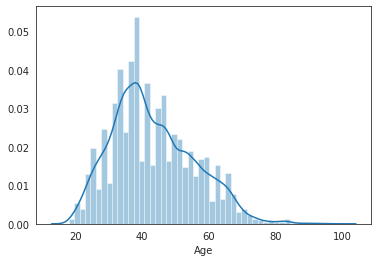

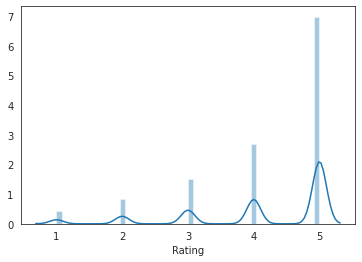

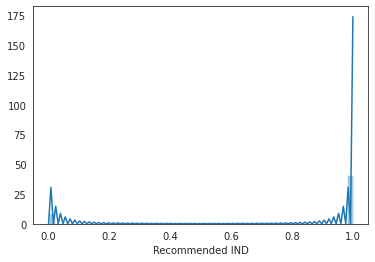

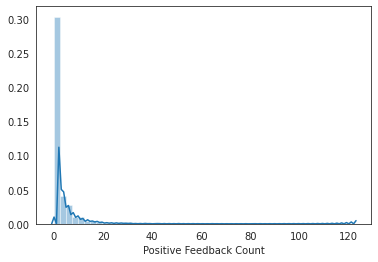

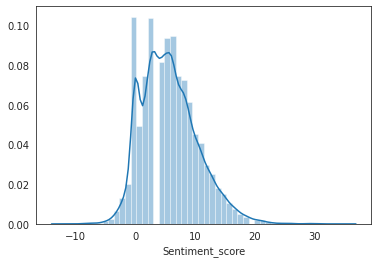

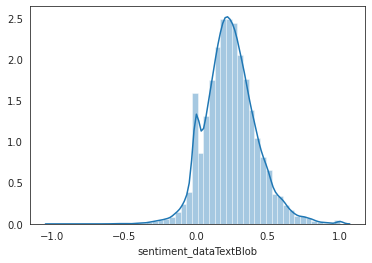

In [24]:
sns.set_style('white')

for i,col in enumerate(review_data.columns):
  plt.figure(i)
  sns.distplot(review_data[col])

In [0]:
review_data.drop('Sentiment_score',axis=1,inplace = True)

In [26]:
review_data

,Age,Rating,Recommended IND,Positive Feedback Count,sentiment_dataTextBlob
0,33,4,1,0,0.633333
1,34,5,1,4,0.339583
2,60,3,0,0,0.073675
3,50,5,1,0,0.550000
4,47,5,1,6,0.512891
...,...,...,...,...,...
23481,34,5,1,0,0.552667
23482,48,3,1,0,0.091667
23483,31,3,0,1,0.414286
23484,28,3,1,2,0.322222


In [0]:
# we will do log transformation for converting non normaly distributed data to normaly distributed 

In [0]:
for col in review_data.columns:
  review_data[col] = np.log(review_data[col]+1)

In [29]:
review_data

,Age,Rating,Recommended IND,Positive Feedback Count,sentiment_dataTextBlob
0,3.526361,1.609438,0.693147,0.000000,0.490623
1,3.555348,1.791759,0.693147,1.609438,0.292359
2,4.110874,1.386294,0.000000,0.000000,0.071087
3,3.931826,1.791759,0.693147,0.000000,0.438255
4,3.871201,1.791759,0.693147,1.945910,0.414022
...,...,...,...,...,...
23481,3.555348,1.791759,0.693147,0.000000,0.439974
23482,3.891820,1.386294,0.693147,0.000000,0.087706
23483,3.465736,1.386294,0.000000,0.693147,0.346625
23484,3.367296,1.386294,0.693147,1.098612,0.279314


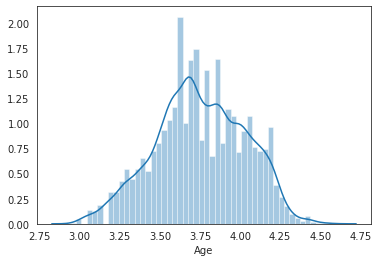

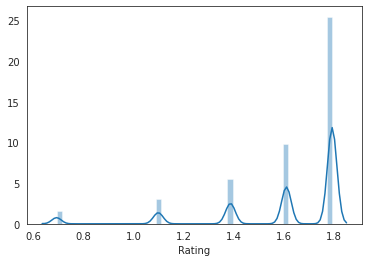

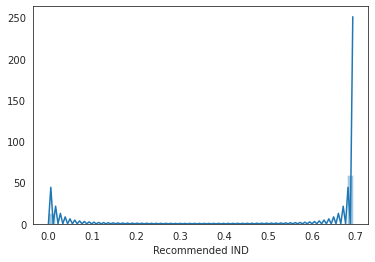

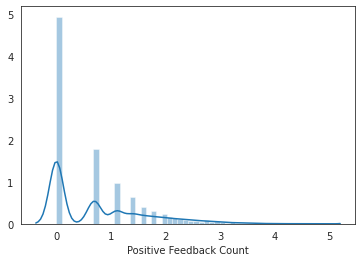

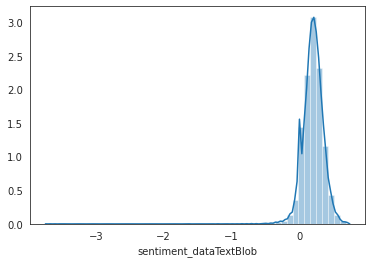

In [30]:
sns.set_style('white')

for i,col in enumerate(review_data.columns):
  plt.figure(i)
  sns.distplot(review_data[col])

In [0]:
from scipy import stats

In [0]:
review_data_std = stats.zscore(review_data)

In [0]:
review_data_std = np.array(review_data_std)

In [34]:
review_data_std

array([[-0.80042837, -0.02893292,  0.4647678 , -0.83739793,  1.88167195],
       [-0.69673322,  0.65006875,  0.4647678 ,  0.97458679,  0.57585897],
       [ 1.29051167, -0.8599638 , -2.15161203, -0.83739793, -0.88148345],
       ...,
       [-1.01729673, -0.8599638 , -2.15161203, -0.05701859,  0.9332669 ],
       [-1.36943975, -0.8599638 ,  0.4647678 ,  0.39947407,  0.48994302],
       [ 0.78761737,  0.65006875,  0.4647678 ,  2.69269638,  0.93141865]])

In [0]:
import pylab as pl

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmean = KMeans(n_clusters=10,max_iter=1000,n_jobs=-1,random_state=1)

In [0]:
kmean_result = kmean.fit(review_data_std)

In [39]:
kmean_result.score(review_data_std)

-34301.42810493766

In [0]:
# I have two things now
  # 1 is find best K value 
  # 2nd is find meaning of each class

In [0]:
kmean = []
score = []
for i,k in enumerate(range(5,40)):
  km = KMeans(n_clusters=k,max_iter=1000,n_jobs=-1,random_state=1)
  result = km.fit(review_data_std)
  kmean.append(result)
  score.append(-1 * result.score(review_data_std))
  


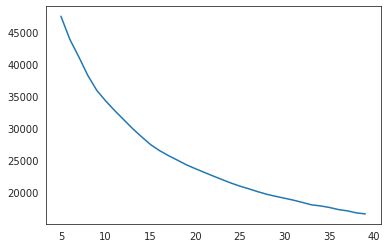

In [42]:
# Elbow curve for best value of K 
pl.plot(range(5,40),score)

In [0]:
# now we get 15 is the best value as per above curve
# we have to do visulaization for that we can take 6 K value

In [0]:
kmean = KMeans(n_clusters=6,max_iter=5000,n_jobs=-1,random_state=1)

In [0]:
result = kmean.fit(review_data_std)

In [46]:
result.labels_

array([0, 2, 1, ..., 1, 0, 2], dtype=int32)

In [0]:
review_data['labels'] = result.labels_

In [48]:
review_data.head(3)

,Age,Rating,Recommended IND,Positive Feedback Count,sentiment_dataTextBlob,labels
0,3.526361,1.609438,0.693147,0.000000,0.490623,0
1,3.555348,1.791759,0.693147,1.609438,0.292359,2
2,4.110874,1.386294,0.000000,0.000000,0.071087,1


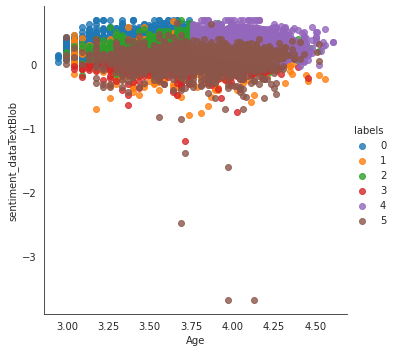

In [49]:
sns.lmplot(x='Age',y='sentiment_dataTextBlob',data=review_data,hue='labels',fit_reg=False)